In [503]:
import warnings
warnings.filterwarnings("ignore")

import kagglehub

path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [504]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [505]:
dataset_path = os.path.join(path, 'heart.csv')
data = pd.read_csv(dataset_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [506]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Visualising the distribution of categorical features like Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope in positive and negative cases.**

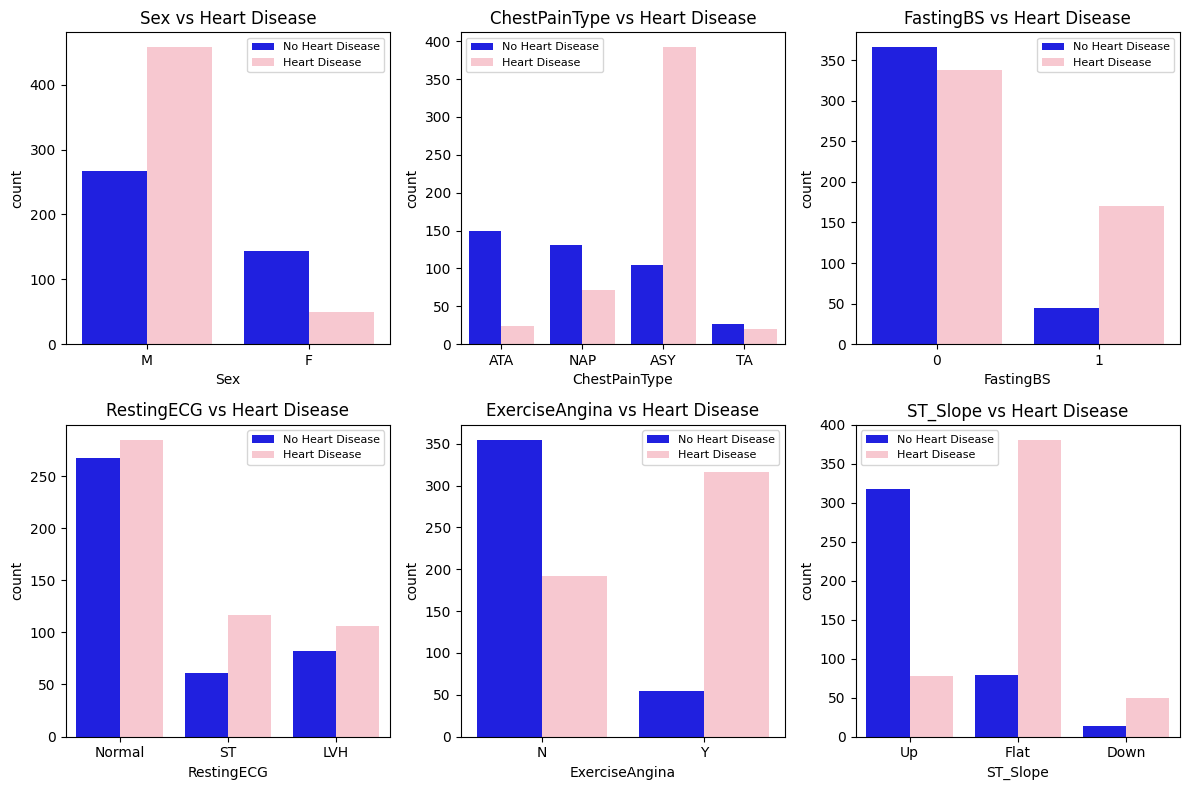

In [507]:
categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(x=feature, data=data, hue="HeartDisease", palette=["blue", "pink"], ax=ax)
    ax.set_title(f"{feature} vs Heart Disease")
    ax.legend(['No Heart Disease', 'Heart Disease'], fontsize=8)

plt.tight_layout()
plt.show()

**Visualizing the age distribution of individuals tested for heart disease and identifying the most affected age group.**

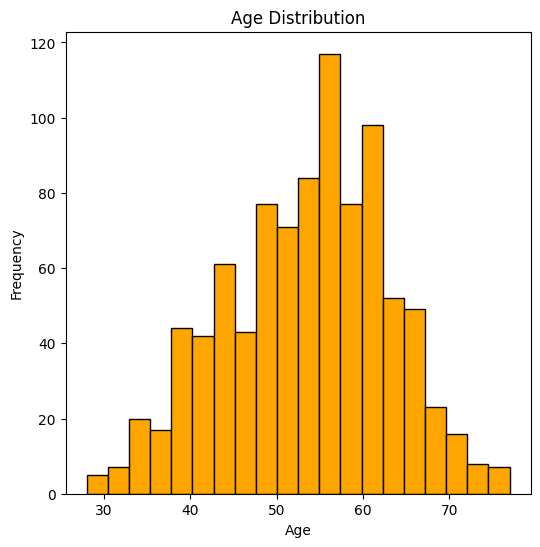

In [508]:
plt.figure(figsize=(6, 6))
plt.hist(data['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

In [509]:
pos_cases = data[data['HeartDisease'] == 1]

age_counts = pos_cases['Age'].value_counts()

most_affected_age = age_counts.idxmax()
print(f"The most affected age group is: {most_affected_age} years")

The most affected age group is: 58 years


**To analyze the relationships between age, cholesterol, resting blood pressure, and maximum heart rate to identify possible correlations and trends in heart disease risk factors.**

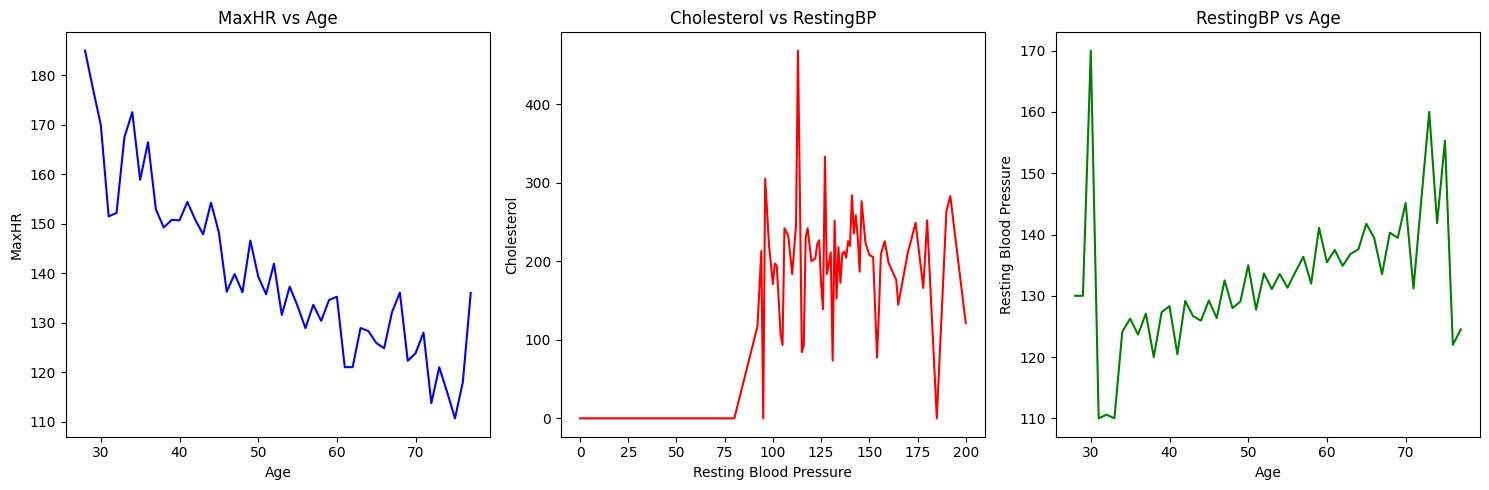

In [510]:
plt.figure(figsize=(15,5))

#MaxHR vs Age
plt.subplot(1, 3, 1)
sns.lineplot(x=data['Age'], y=data['MaxHR'],  color='blue', ci=None)
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('MaxHR vs Age')

#Cholesterol vs RestingBP
plt.subplot(1, 3, 2)
sns.lineplot(x=data['RestingBP'], y=data['Cholesterol'],  color='red', ci=None)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.title('Cholesterol vs RestingBP')

#RestingBP vs Age
plt.subplot(1, 3, 3)
sns.lineplot(x=data['Age'], y=data['RestingBP'], color='green', ci=None)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('RestingBP vs Age')

plt.tight_layout()
plt.show()


*   MaxHR decreases with age.
*   Cholesterol and RestingBP do not show a clear correlation, suggesting that having high cholesterol does not necessarily indicate high blood pressure.
* RestingBP tends to increase with age.

**Determining the total number of cases associated with each chest pain type.**

In [511]:
#Count total cases per ChestPainType (both 0 and 1)
chest_pain_counts = data.groupby('ChestPainType')['HeartDisease'].count()
print("Total cases per Chest Pain Type:")
print(chest_pain_counts)

Total cases per Chest Pain Type:
ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: HeartDisease, dtype: int64


**Determining the number of positive cases associated with each chest pain type.**

Total positive cases per Chest Pain Type:
ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64


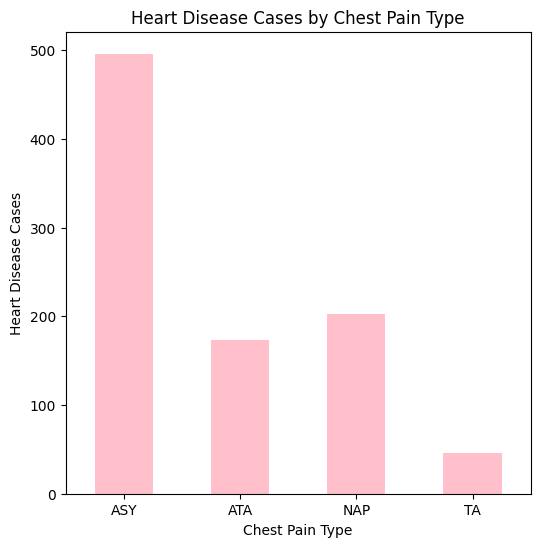

In [512]:
chest_pain_sum = data.groupby('ChestPainType')['HeartDisease'].sum() #chest pain cases only for pos cases

print("Total positive cases per Chest Pain Type:")
print(chest_pain_sum)

plt.figure(figsize=(6, 6))
chest_pain_counts.plot(kind='bar', color='pink')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease Cases')
plt.title('Heart Disease Cases by Chest Pain Type')
plt.xticks(rotation=0)
plt.show()


In [513]:
from sklearn.preprocessing import MinMaxScaler

# One-hot encode categorical variables
categorical_cols = ["ChestPainType", "RestingECG", "Sex", "ExerciseAngina", "ST_Slope"]
data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)

# Select numerical columns for normalization
numerical_cols = ["Age", "Cholesterol", "RestingBP", "MaxHR", "Oldpeak"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Print results
data_encoded.head()  # Check the transformed dataset


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1


**Splitting the encoded dataset into train and test dataset.**

In [514]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (734, 11), Test set: (184, 11)


One hot encoding the categorical columns.

In [515]:
X_train = pd.get_dummies(X_train, dtype=int)
X_test = pd.get_dummies(X_test, dtype=int)


In [516]:
data = data.dropna()
data.reset_index(drop=True, inplace=True)

print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**Training:**

In [517]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [518]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000, random_state=42)

val_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
log_reg_val_acc = val_scores.mean()

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

log_reg_test_acc = accuracy_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Validation Accuracy: {log_reg_val_acc:.4f}")
print(f"Logistic Regression Test Accuracy: {log_reg_test_acc:.4f}")



Logistic Regression Validation Accuracy: 0.8487
Logistic Regression Test Accuracy: 0.8859


In [527]:
sample = X_test.iloc[100].values.reshape(1, -1)
prediction = log_reg.predict(sample)
print(f"Logistic Regression Prediction: {prediction[0]}")


Logistic Regression Prediction: 1


**Decision Tree Classifier**

In [519]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

val_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_val_acc = val_scores.mean()

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_test_acc = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Validation Accuracy: {dt_val_acc:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_acc:.4f}")


Decision Tree Validation Accuracy: 0.8079
Decision Tree Test Accuracy: 0.7935


In [528]:
dt_pred = dt_model.predict(sample)
print(f"Decision Tree Prediction: {dt_pred[0]}")


Decision Tree Prediction: 1


**Random Forest Classifier**

In [520]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_val_acc = val_scores.mean()

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_test_acc = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Validation Accuracy: {rf_val_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")


Random Forest Validation Accuracy: 0.8515
Random Forest Test Accuracy: 0.8913


In [529]:
rf_pred = rf_model.predict(sample)
print(f"Random Forest Prediction: {rf_pred[0]}")

Random Forest Prediction: 1


**Support Vector Machine (SVM)**

In [521]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)

val_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
svm_val_acc = val_scores.mean()

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

svm_test_acc = accuracy_score(y_test, y_pred_svm)

print(f"SVM Validation Accuracy: {svm_val_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")


SVM Validation Accuracy: 0.8610
SVM Test Accuracy: 0.8859


In [534]:
sample1 = X_test.iloc[10].values.reshape(1, -1)
svm_pred = svm_model.predict(sample1)
print(f"SVM Prediction: {svm_pred[0]}")

SVM Prediction: 1


**Naïve Bayes**

In [522]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

val_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
nb_val_acc = val_scores.mean()

nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

nb_test_acc = accuracy_score(y_test, y_pred_nb)

print(f"Naïve Bayes Validation Accuracy: {nb_val_acc:.4f}")
print(f"Naïve Bayes Test Accuracy: {nb_test_acc:.4f}")


Naïve Bayes Validation Accuracy: 0.8542
Naïve Bayes Test Accuracy: 0.8859


In [535]:
nb_pred = nb_model.predict(sample1)
print(f"Naïve Bayes Prediction: {nb_pred[0]}")

Naïve Bayes Prediction: 1


**K-Nearest Neighbors (KNN)**

In [523]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

val_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
knn_val_acc = val_scores.mean()

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

knn_test_acc = accuracy_score(y_test, y_pred_knn)

print(f"KNN Validation Accuracy: {knn_val_acc:.4f}")
print(f"KNN Test Accuracy: {knn_test_acc:.4f}")


KNN Validation Accuracy: 0.8446
KNN Test Accuracy: 0.9185


In [536]:
knn_pred = knn_model.predict(sample1)
print(f"KNN Prediction: {knn_pred[0]}")

KNN Prediction: 1
